<style>
    h1 {
    font-family: 'Segoe UI Semibold';
    font-size: 35px;
    text-align: center;
  }
</style>

# Taller Análitica: Productividad en Manufactura

<style>
  .image {
            overflow: hidden;
            width: 100%;
            border-radius: 20px;
            object-fit: cover;
        }
  .container {
            width: 100%;
            height: auto;
        }
 
</style>
<div class="container">
    <img src= "img\production-line2.png" class="image"/>
</div>

<style>
  p {
    font-family: 'Segoe UI Light';
    font-size: 20px;
    text-align: center;
  }
</style>

<div style="text-align: center;">
  Analítica de Datos <br>
  Universidad de los Andes & Instituto Tecnólogico de Monterrey &copy; 2024 <br>
  11 de octubre de 2024 <br><br>
  <strong>GRUPO 7:</strong> <br>
  Camilo Duque - 202024289 (uniandes)<br>
  Daniela Espinosa - 202022615 (uniandes)<br>
  Emilio Fernández - (TEC)<br>
</div>


## **Tarea 1**

Determine la pregunta (o preguntas) de negocio que quiere resolver para su cliente
seleccionado. Identifique como puede resolver estas preguntas a traves de visualizaciones
de los datos (descriptivo) y un modelo predictivo (idealmente de regresion, pero tambien
puede ser de clasificacion).


## **Tarea 2**
Cargue los datos en python, explore los datos disponibles y realice una limpieza cuidadosa. Identifique datos faltantes, inconsistencias, datos duplicados y decida una estrategia para su gestion. Asegurese de que los datos queden en un formato que permita su posterior analisis. Documente los procedimientos realizados.



### **Cargar Librerias**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as pyplot

In [23]:
data = pd.read_csv('productividad.csv', sep=";")

In [24]:
data.shape

(1197, 15)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   object 
dtypes: f

In [26]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


In [27]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


1. Verificar cuantos datos faltantes hay por cada variable.

In [28]:
empty_rows_per_column = data.isnull().sum()
print(f'Número de datos faltantes: \n{empty_rows_per_column}')

Número de datos faltantes: 
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [29]:
data_na = data[data.isna().any(axis=1)]
data_na

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
6,1/01/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755166667
13,1/01/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705916667
14,1/01/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676666667
15,1/01/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505888889


In [30]:
data_na.department.unique()

array(['finishing ', 'finishing'], dtype=object)

Como se puede ver el WIP tambien conocido como Work In Progress en una linea de producción es un indicador que nos dice cuantas unidades hay en ese proceso en ese instante de tiempo. Todas las que son NAs son del department de "finishing", entonces no es que los datos esten faltantes, sino que el WIP cuando se termina un producto es precisamente cero.

In [31]:
data['wip'] = data['wip'].fillna(0)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


Revisar datos duplicados

In [32]:
data_duplicados = data.duplicated().sum()
print(f'Número de datos duplicados: {data_duplicados}')

Número de datos duplicados: 0


Revisar los valores de los datos de cada columna

In [33]:
data_variables = data.apply(lambda x: np.sort(pd.Series.unique(x)))
print(f'Valores únicos por columna: \n {data_variables}\n')

data_num_variables = data.apply(pd.Series.nunique).sort_values(ascending=False)
print(f'Numero de valores únicos por columna: \n {data_num_variables}')

Valores únicos por columna: 
 date                     [1/01/2015, 1/03/2015, 1/04/2015, 1/05/2015, 1...
quarter                  [Quarter1, Quarter2, Quarter3, Quarter4, Quart...
department                                 [finishing, finishing , sweing]
day                      [Monday, Saturday, Sunday, Thursday, Tuesday, ...
team                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
targeted_productivity    [0.07, 0.35, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8]
smv                      [2.9, 3.9, 3.94, 4.08, 4.15, 4.3, 4.6, 5.13, 1...
wip                      [0.0, 7.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...
over_time                [0, 120, 240, 360, 480, 600, 720, 840, 900, 96...
incentive                [0, 21, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34...
idle_time                [0.0, 2.0, 3.5, 4.0, 4.5, 5.0, 6.5, 8.0, 90.0,...
idle_men                           [0, 10, 15, 20, 25, 30, 35, 37, 40, 45]
no_of_style_change                                               [0, 1

Algo inusual es que en la columna "day" solo aparecen 6 dias de la semana, La semana tiene 7 dias, el dia "Friday" (viernes) no aparece en los datos, habría que analizar bien si fue por perdida de datos o sencillamente fue que los viernes la fabrica no opera.

In [34]:
data.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

Como se puede evidenciar en la columna departmento hay un duplicado de una variable que es "finishing" y "finishing " una tiene un espacio al final, entonces lo toma como un valor diferente. Dado que son el mismo departamento, entonces vamosa unificar los dos en "finishing". Ademas "sweing" esta mal escrito en ingles, deberia ser "sewing".

In [35]:
data['department'] = data['department'].replace({'finishing ':'finishing', 'sweing':'sewing'})
data.department.unique()

array(['sewing', 'finishing'], dtype=object)

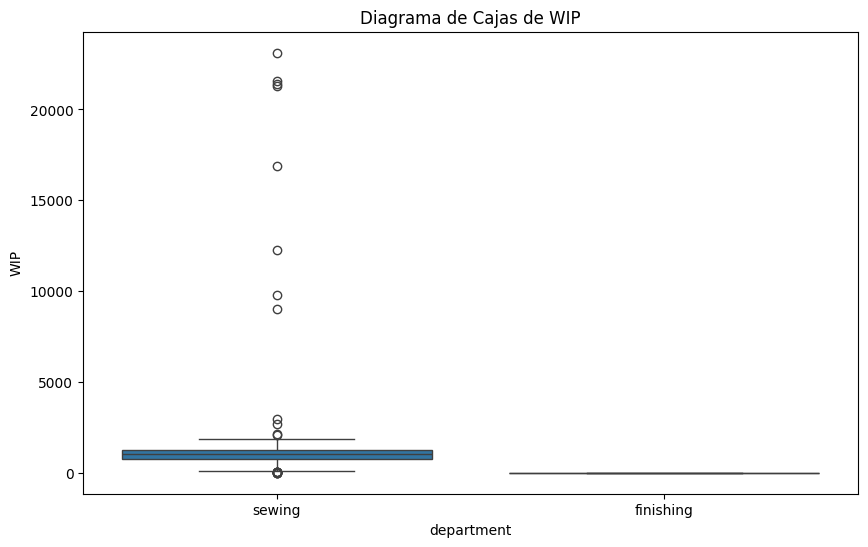

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['wip'], x=data['department'])
plt.title('Diagrama de Cajas de WIP')
plt.xlabel('department')
plt.ylabel('WIP')
plt.show()

Aqui se puede ver que la unica variable que tiene datos faltantes es la de wip (trabajo en progreso), por lo que haremos un histograma para ver la distribucion de dicha variable.

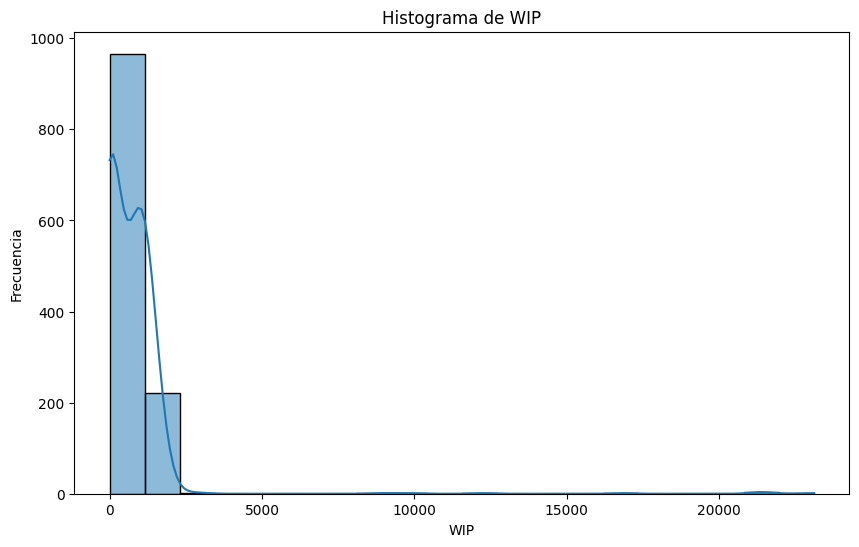

In [37]:
# prompt: Creame un histograma de la variable wip en data

plt.figure(figsize=(10, 6))
sns.histplot(data['wip'], bins=20, kde=True)
plt.title('Histograma de WIP')
plt.xlabel('WIP')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable "wip" muestra una distribución sesgada hacia la derecha, con muchos valores concentrados cerca de cero y algunos valores extremos (outliers) que están muy alejados del resto de los datos. Primero crearemos una tabla de correlaciones para ver como se comportan las otras variables conforme a wip.

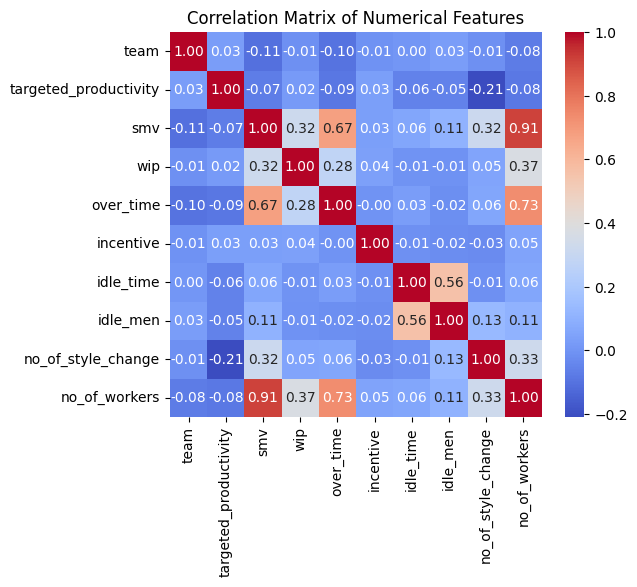

In [38]:
# Extract numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Las variables numéricas más correlacionadas con "wip" son las siguientes:

*   incentive (0.17): Tiene una correlación positiva moderada.
*   actual_productivity (0.11): Correlación positiva ligera.
*   targeted_productivity (0.06): Correlación positiva baja.
*   no_of_workers (0.03): Correlación positiva baja.
*   over_time (0.02): Correlación positiva mínima.

Podemos observar que la correlacion es muy baja y por lo tanto un modelo de regresion lineal multiple no seria muy adecuado. Por lo tanto, optaremos por utilizar la mediana, que es una medida de tendencia central la cual no se ve afectada por los outliers y que podría funcionar muy bien con estos datos faltantes.

In [39]:
wip_median = data['wip'].median()

data['wip'].fillna(wip_median, inplace=True)

empty_rows_per_column = data.isnull().sum()
empty_rows_per_column

C:\Users\LEGION\AppData\Local\Temp\ipykernel_20092\1544559285.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['wip'].fillna(wip_median, inplace=True)


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Avanzando un poco hacia las inconsistencias, analizamos que la variable de no_of_workers (numero de trabajadores por equipo) tiene valores decimales, llegando a tener valores con .5, lo cual no es posible ya que estamos hablando de personas y no puede haber media persona, deben de ser enteros, por eso redondearemos dichos valores a su entero mas cercano.

In [40]:
data_no_workers_decimal = data[data["no_of_workers"].apply(lambda x: isinstance(x,float) and x !=0 and x % 1 != 0)]
data_no_workers_decimal

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
2,1/01/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
7,1/01/2015,Quarter1,sewing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683478
9,1/01/2015,Quarter1,sewing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750427826
10,1/01/2015,Quarter1,sewing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721126957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2/15/2015,Quarter3,sewing,Sunday,5,0.80,30.10,679.0,7140,0,0.0,0,0,59.5,0.722568627
780,2/15/2015,Quarter3,sewing,Sunday,4,0.75,30.10,919.0,7140,0,0.0,0,1,59.5,0.598627451
782,2/15/2015,Quarter3,sewing,Sunday,2,0.80,22.52,12.0,6900,0,0.0,0,0,57.5,0.432122899
847,2/19/2015,Quarter3,sewing,Thursday,4,0.80,30.10,859.0,7020,63,0.0,0,1,58.5,0.800094017


In [41]:
data['no_of_workers'] = round(data['no_of_workers'])

data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492
3,1/01/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492
4,1/01/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


Tambien encontramos que la variable de productividad real esta en formato de object, lo cual es incorrecto ya que deberia de ser un formato de decimales, por lo cual haremos ese cambio.

Adicionalmente se uso como separador de miles el ".". Sin embargo, para pandas este es el separador decimal, entonces lazaba un error al convertir a numeric entonces se hizo coearce para convertirlos a NaN. A continuación, se muestran estos datos que no se pudieron parse porque tenian comos separador de miles ".", por lo tanto lo tomaba como un string.

In [42]:
problem_acutal_productivity_decimal = data[data["actual_productivity"].str.count("\.") > 1]
problem_acutal_productivity_decimal["actual_productivity"].head(10)

337    1.033.570.076
437    1.059.621.212
456    1.000.230.409
457    1.000.230.409
477    1.000.230.409
478    1.000.230.409
498    1.000.230.409
518    1.000.457.471
519    1.000.230.409
542       10.115.625
Name: actual_productivity, dtype: object

In [43]:
data['actual_productivity'] = pd.to_numeric(data['actual_productivity'], errors='coerce')
#data['actual_productivity'].fillna(0, inplace=True)

In [44]:
actual_productivity_NAs = data['actual_productivity'].isna().sum()
print(f'Cantidad de datos NAs: {actual_productivity_NAs}')

data = data.dropna(subset=["actual_productivity"])
print(data.shape)


Cantidad de datos NAs: 36
(1161, 15)


Ademas se reviso si habian datos de "actual_produtivity" que no estuvieran dentro del intervalo $0 \leq x_i \leq 1,  \forall i \in n$ 

In [45]:
problema_actual_productivity_fuera_range = data[(data["actual_productivity"] < 0) | (data["actual_productivity"] > 1)]
problema_actual_productivity_fuera_range

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
712,2/11/2015,Quarter2,finishing,Wednesday,12,0.8,4.08,0.0,1080,0,0.0,0,0,9.0,1.02


In [46]:
data = data.drop(problema_actual_productivity_fuera_range.index)

In [47]:
data.shape

(1160, 15)

Tambien ya se reviso y no se encontraron valores negativos en las columnas donde no deberían existir (como SMV, WIP, tiempo extra, incentivos, etc.).

Conforme a datos duplicados solo encontramos que hay varias entradas duplicadas en cuanto a la combinación de fecha y equipo. Esto podría ser un error si no deberían existir múltiples registros por equipo en el mismo día, pero al no saber con exactitud como maneja este aspecto la empresa con la que trabajamos, ignoraremos o aceptaremos que hayan dichos datos duplicados ya que asumimos que un solo equipo puede tener varios trabajos en un solo día.

## **Tarea 3**
Realice un analisis exploratorio que permita describir estadıstica y visualmente el
comportamiento de las variables a considerar. Calcule estadısticas descriptivas, realice
histogramas, diagramas de caja, diagramas de dispersion, diagramas de violın y otros que
permitan comprender como se comportan las variables. Documente el analisis realizado.


## **Tarea 4**
Aquı debera explorar los diferentes modelos y diferentes configuraciones de los mismos,
realizar ingenierıa de caracterısticas (variables), emplear diferentes metodos de estimacion,
comparar y seleccionar las mejores alternativas, considerando diferentes metricas. Consulte bibliografıa que le permita contar con elementos para proponer los modelos. No es
necesario emplear todas las variables disponibles, pero todas las variables incluidas y sus
relaciones deben estar correctamente justificadas. Como hay un buen numero de variables,
se espera que el modelo desarrollado por cada equipo sea unico. Evalue su modelo usando
metricas apropiadas. Documente el modelamiento realizado.
